# Load Libraries

In [2]:
library('MASS')

In [20]:
?Boston

In [6]:
Boston[1:10,]

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [12]:
dim(Boston)

[1] 506  14

# Fitting a linear model between medv and lstat

In [9]:
lm.fit = lm(medv~lstat,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


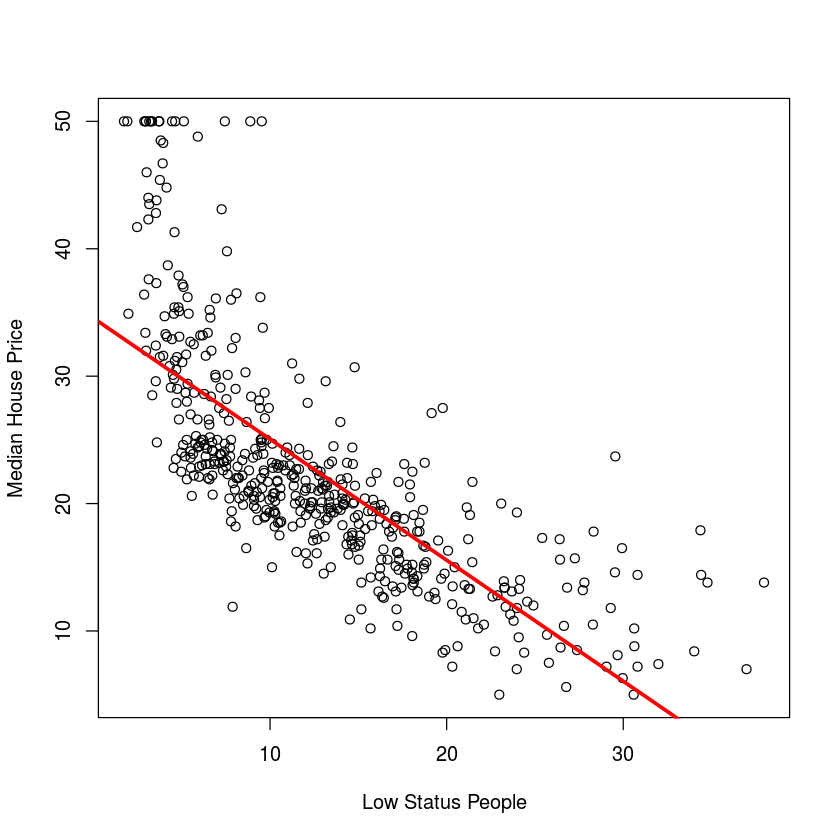

In [26]:
plot(Boston$lstat,Boston$medv, xlab='Low Status People', ylab='Median House Price')
abline(lm.fit, col="Red", lwd=3)

# Residual Plots

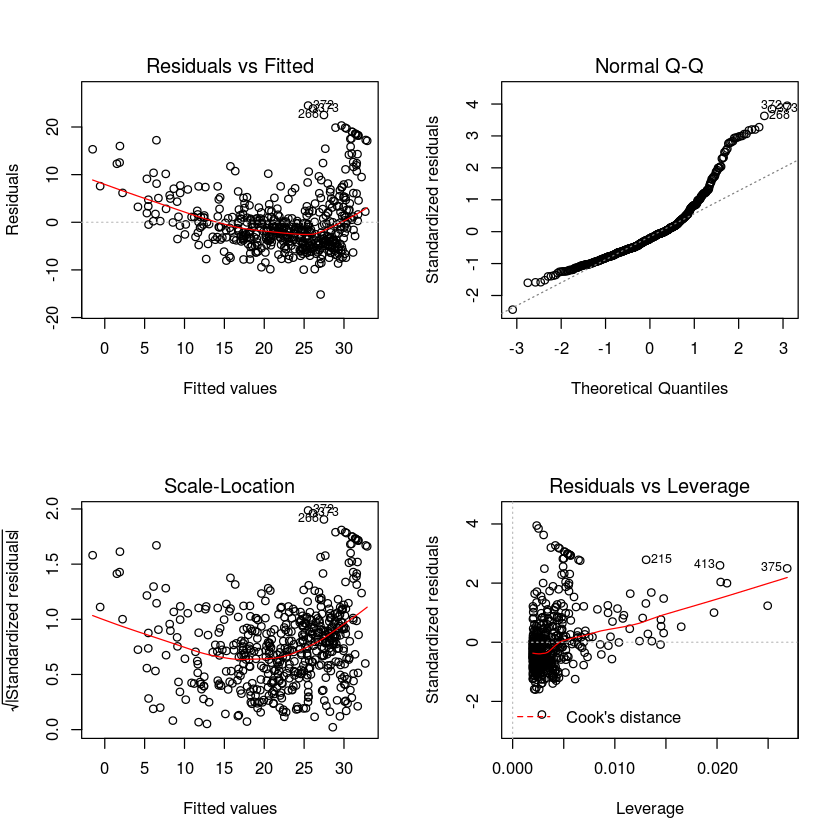

In [27]:
par(mfrow=c(2,2))
plot(lm.fit)

# Potential Problems

### 1. Correlation of error terms
....

### 2. Non-linearity of the data
A pattern among Residual and Fitted indicates a strong non-linearity in the data. We can use non transformation of predictors, such as - logX, rootX, X^2. OR we can use non-linear models.

### 3. Non Constant variance of error terms (Heteroscedasticity)
Funnel shape not observed in Residual Plot, so we can say that Heteroscedasticity is absent, which is expected.
If Heteroscedasticity is faced, the one possible solution is to transform response variable by concave function like logY, rootY.

### 4. Outlier
Some outliers are indentified in Residual/Studentized Residual Plot.

### 5. High Leverag Points
Some High Leverage points is identified in Residual Vs Leverage Plot, it should be removed for better fit.

### 6. Collinearity
Not applicabe in case of one variable.

Checking multicolinearity for independent variables. <br>
    VIF(lm(Wind ~ Temp+Solar.R, data=airquality)) <br>
    VIF(lm(Temp ~ Wind+Solar.R, data=airquality)) <br>
    VIF(lm(Solar.R ~ Wind+Temp, data=airquality))

In [15]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

# Prediction with Confidence Interval

In [18]:
predict(lm.fit,data.frame(lstat=c(5,10,15)),interval="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


#### 95% confidence interval associate with 10% of lower state population is (24.47K , 25.63K) dollars.

# Predict with prediction interval 

In [21]:
predict(lm.fit,data.frame(lstat=c(5,10,15)),interval="prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


#### 95% prediction interval associate with 10% of lower state population is (12.82K, 37.27K) dollars.

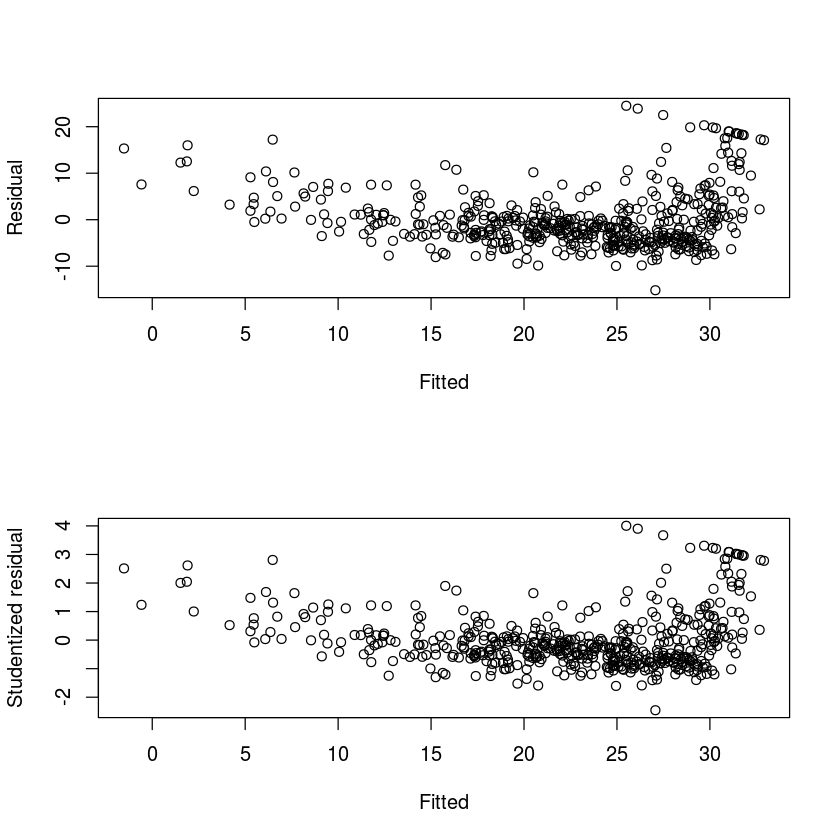

In [38]:
par(mfrow=c(2,1))
plot(predict(lm.fit),residuals(lm.fit), xlab='Fitted' ,ylab='Residual')
plot(predict(lm.fit),rstudent(lm.fit), xlab='Fitted', ylab='Studentized residual')

# Computing liverage statistics

375 
375

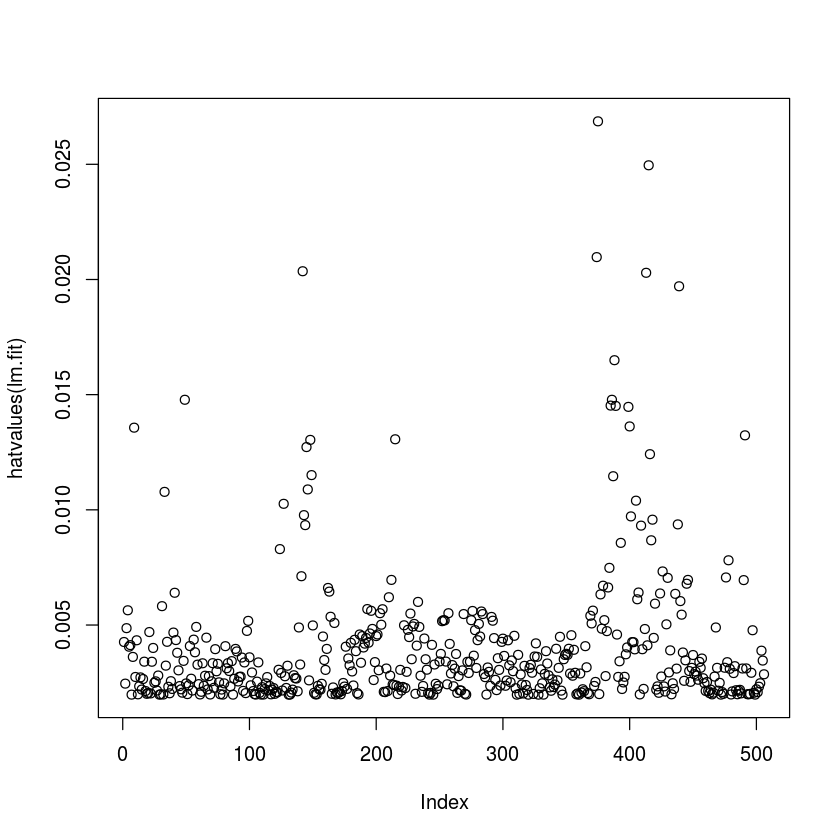

In [37]:
plot(hatvalues(lm.fit))
which.max(hatvalues (lm.fit))  # Identifies index of the largest element